So, Twitter returns the trending info in the order it appears... where does each hashtag rank?

In [2]:
from imports import *

In [3]:
def get_trend_behavior(ht):
    '''Takes a hashtag and compiles all trend date about it
    Currently just returns the beginning and end of the trending status, but can do more potentially
    '''
    res = []
    for entry in os.scandir(TRENDS_DIR):
        # crude filtering for date csv names
        if entry.path[-7] == '-':
            df = pd.read_csv(entry, header=None,
                            names=['hashtag', 'place',
                                   'level', 'day',
                                   'time', 'volume', 'nan'])
            df['hashtag'] = df.hashtag.apply(lambda x: x.replace('#','').lower())
            try:
                df['datetime'] = pd.to_datetime(df.day + df.time, format='%Y-%m-%d%H:%M')
            except:
                print('error with hashtag', ht)
                return df
            temp = df.query(f'hashtag == "{ht}"')
            if len(temp) > 0:
                res.append(df)
    if len(res) > 0:
        return pd.concat(res)
    else:
        print(ht, 'did not appear to trend')
        return pd.DataFrame()

In [15]:
def extract_trending_positions(df, ht):
    df['datetime'] = pd.to_datetime(df.time + ' ' + df.day)
    first_nationwide_trend = df.query(f'hashtag == "{ht}" and place == "India"').datetime.min()
    temp = df[df.place == "India"]
    temp = temp[temp.datetime >= first_nationwide_trend]
    temp = temp.drop_duplicates()
    temp['within_group_ranking'] = temp.groupby('datetime').datetime.transform(lambda x: list(range(len(x))))
    return temp.query(f'hashtag == "{ht}"')#.within_group_ranking.to_list()

In [5]:
campaigns = preprocessing.load_campaign()

In [16]:
res_dict = {}
for hashtag in campaigns.keys():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        print(hashtag)
        f_name = os.path.join(TRENDS_DIR, f'{hashtag}_country_trending.pkl')
        extract_trending_positions(get_trend_behavior(hashtag), hashtag).to_pickle(f_name)

jharkhandwithmodi
surgingsilk
merapmmeraabhimaan
kiamadeinap
dousupportnaxals
mizoramwithmodi
timesofrahul
threadsofexcellence
msmetextilesconclave
bjp4jind
म्हारा_वोट_भाजपा_को
parakramparv
technicaltextiles
himachalkacu
congaapbhaibhai
sizeindia
savekeralafromcommunists
copypastencp
bjp4betterandhra
jaihindkisena
congressinsultsairforce
armedforcesweek2018
newindia4narishakti
congressdefencescams
pminprayagraj
amethikididismritiirani
namowithtraders
corruptcongressfearsdemo
artisanspeak
indiabolemodidobara
urban_नक्सली_केजरीवाल
zamanatke1000din
yuvakemannkibaat
iafbacksrafale
भारत_माता_की_जय
namothon
लक्ष्य_हमारा_मोदी_दोबारा
आदर्शघोटाला_संघर्ष_यात्रा
pminraebareli
bjpforsamridhkisan
facebookboomed
badalrahihaikashi
lawlessodisha
rafailgandhi
rahulkidefencedeals
rahulgandhijavabdo
ragafailonrafale
successofmakeinindia
pmkisan
congresseurofighterscandal
modimeinhaidum
takingforwardhinducause
myfirstvoteformodi
shahforgandhinagar
maikamalkhilaneayahu
उत्तरप्रदेश_विजय_संकल्प
removetraitor

In [50]:
with open(os.path.join(TWITTER_DATA_DIR, 'trending_rankings.pkl'), 'wb') as f:
    pickle.dump(res_dict,f)

# Debug


In [8]:
ht = 'jharkhandwithmodi'
df = get_trend_behavior(ht)

In [12]:
df.query('level == "Country" and hashtag == "jharkhandwithmodi"').drop_duplicates()

,hashtag,place,level,day,time,volume,nan,datetime
12081,jharkhandwithmodi,India,Country,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
13154,jharkhandwithmodi,India,Country,2019-02-17,11:00,NaN,NaN,2019-02-17 11:00:00
14256,jharkhandwithmodi,India,Country,2019-02-17,12:00,NaN,NaN,2019-02-17 12:00:00
15379,jharkhandwithmodi,India,Country,2019-02-17,13:00,NaN,NaN,2019-02-17 13:00:00
16478,jharkhandwithmodi,India,Country,2019-02-17,14:00,NaN,NaN,2019-02-17 14:00:00
17588,jharkhandwithmodi,India,Country,2019-02-17,15:00,11041.0,NaN,2019-02-17 15:00:00
18697,jharkhandwithmodi,India,Country,2019-02-17,16:00,11804.0,NaN,2019-02-17 16:00:00


In [52]:
top_rankings = {k: min(v) for k,v in res_dict.items()}
pd.Series(top_rankings)

jharkhandwithmodi             4
surgingsilk                   4
merapmmeraabhimaan            0
kiamadeinap                  30
dousupportnaxals             17
                             ..
jaihobc                      39
modifiedtextiles             21
meraparivarbhajapaparivar     0
modifiedjobs                  0
gappupappu                   18
Length: 64, dtype: int64

In [54]:
{k: v[0] for k,v in res_dict.items()}

{'jharkhandwithmodi': 31,
 'surgingsilk': 4,
 'merapmmeraabhimaan': 1,
 'kiamadeinap': 30,
 'dousupportnaxals': 17,
 'mizoramwithmodi': 35,
 'timesofrahul': 29,
 'threadsofexcellence': 1,
 'msmetextilesconclave': 29,
 'bjp4jind': 27,
 'म्हारा_वोट_भाजपा_को': 15,
 'parakramparv': 2,
 'technicaltextiles': 32,
 'himachalkacu': 44,
 'congaapbhaibhai': 30,
 'sizeindia': 23,
 'savekeralafromcommunists': 5,
 'copypastencp': 24,
 'bjp4betterandhra': 26,
 'jaihindkisena': 3,
 'congressinsultsairforce': 4,
 'armedforcesweek2018': 4,
 'newindia4narishakti': 13,
 'congressdefencescams': 4,
 'pminprayagraj': 4,
 'amethikididismritiirani': 47,
 'namowithtraders': 35,
 'corruptcongressfearsdemo': 35,
 'artisanspeak': 3,
 'indiabolemodidobara': 28,
 'urban_नक्सली_केजरीवाल': 37,
 'zamanatke1000din': 4,
 'yuvakemannkibaat': 27,
 'iafbacksrafale': 22,
 'भारत_माता_की_जय': 38,
 'namothon': 26,
 'लक्ष्य_हमारा_मोदी_दोबारा': 1,
 'आदर्शघोटाला_संघर्ष_यात्रा': 7,
 'pminraebareli': 4,
 'bjpforsamridhkisan': 33,
 '

Text(0.5, 1.0, '# of Hours Hashtag Trended For')

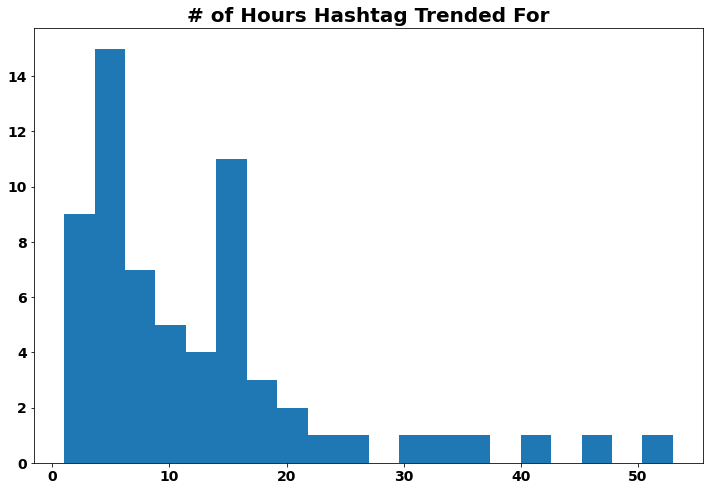

In [59]:
plt.hist([len(v) for k,v in res_dict.items()], bins=20)
plt.title('# of Hours Hashtag Trended For')

Text(0.5, 1.0, 'Average Ranking')

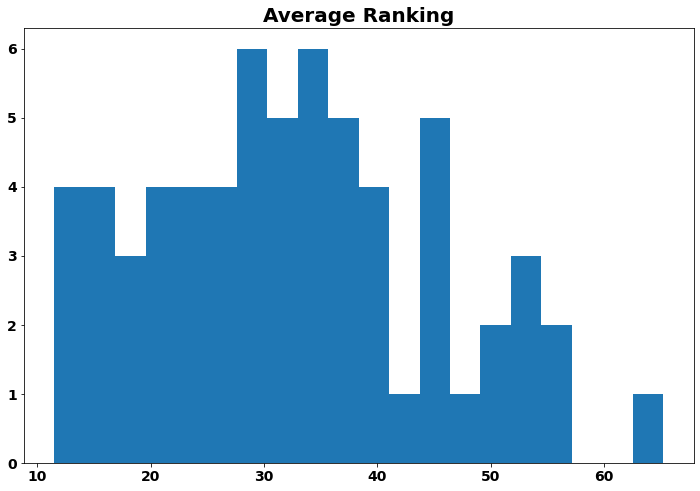

In [62]:
plt.hist([np.mean(v) for k,v in res_dict.items()], bins=20)
plt.title('Average Ranking')

Text(0.5, 1.0, 'Peak Ranking')

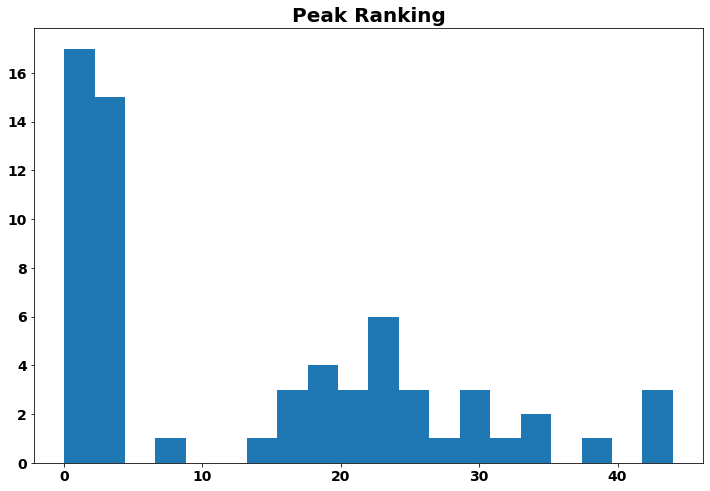

In [61]:
plt.hist([min(v) for k,v in res_dict.items()], bins=20)
plt.title('Peak Ranking')

Text(0, 0.5, 'Peak Ranking')

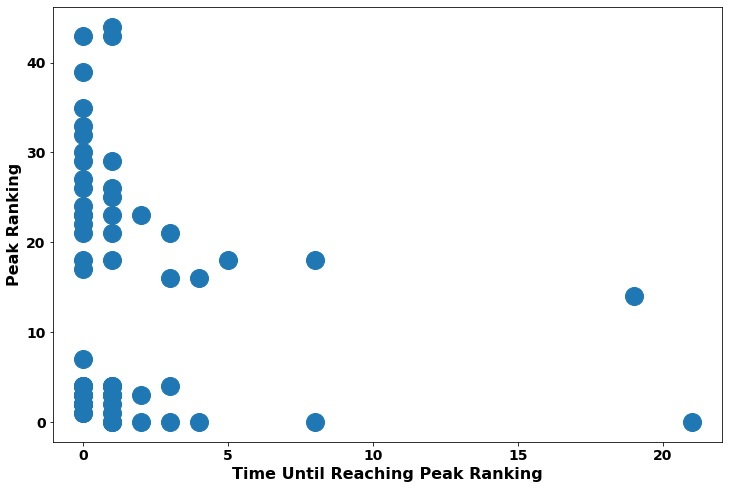

In [64]:
plt.scatter([v.index(min(v)) for k,v in res_dict.items()], [min(v) for k,v in res_dict.items()])
plt.xlabel('Time Until Reaching Peak Ranking')
plt.ylabel('Peak Ranking')

Text(0.5, 1.0, 'Time of Reaching Peak Ranking')

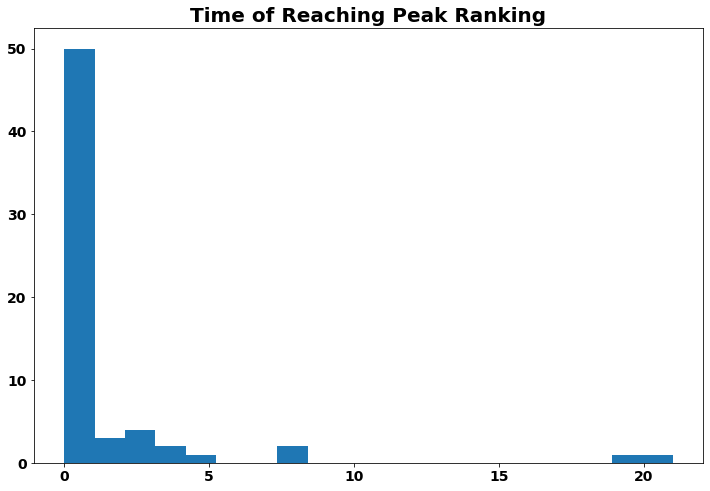

In [60]:
plt.hist([v.index(min(v)) for k,v in res_dict.items()], bins=20)
plt.title('Time of Reaching Peak Ranking')

In [53]:
{k: v.index(min(v)) for k,v in res_dict.items()}

{'jharkhandwithmodi': 1,
 'surgingsilk': 0,
 'merapmmeraabhimaan': 2,
 'kiamadeinap': 0,
 'dousupportnaxals': 0,
 'mizoramwithmodi': 0,
 'timesofrahul': 1,
 'threadsofexcellence': 0,
 'msmetextilesconclave': 0,
 'bjp4jind': 1,
 'म्हारा_वोट_भाजपा_को': 3,
 'parakramparv': 0,
 'technicaltextiles': 1,
 'himachalkacu': 1,
 'congaapbhaibhai': 2,
 'sizeindia': 0,
 'savekeralafromcommunists': 1,
 'copypastencp': 0,
 'bjp4betterandhra': 3,
 'jaihindkisena': 0,
 'congressinsultsairforce': 0,
 'armedforcesweek2018': 1,
 'newindia4narishakti': 1,
 'congressdefencescams': 0,
 'pminprayagraj': 1,
 'amethikididismritiirani': 1,
 'namowithtraders': 3,
 'corruptcongressfearsdemo': 8,
 'artisanspeak': 0,
 'indiabolemodidobara': 4,
 'urban_नक्सली_केजरीवाल': 2,
 'zamanatke1000din': 0,
 'yuvakemannkibaat': 0,
 'iafbacksrafale': 1,
 'भारत_माता_की_जय': 4,
 'namothon': 0,
 'लक्ष्य_हमारा_मोदी_दोबारा': 1,
 'आदर्शघोटाला_संघर्ष_यात्रा': 0,
 'pminraebareli': 1,
 'bjpforsamridhkisan': 0,
 'facebookboomed': 1,
 'bad